In [14]:
# Fit a Multinomial Logistic Regression model to the USPS Digit Recognizer data set. 
# Create a professional quality presentation describing your model and its application to a business use case.

In [1]:
# Packages imported to us

import numpy as np
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os as os

In [2]:
# Defining Functions

def one_hot_encode(y): 
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y

def softmax(H): # activation function that takes a matrix of logits (X.T.dot W)
    eh = np.exp(H)
    return eh / (eh.sum(axis = 1, keepdims = True)) # returns a column vector 

def cross_entropy(Y, P): # Objective Function
    return -np.sum(Y*np.log(P))

def accuracy(y, P): # Pick the column that has the highest probability
    return np.mean(y == P.argmax(axis = 1))


In [3]:
# Loading the dataset 

usps = pd.read_csv('usps_digit_recognizer.csv')

usps.shape

# Set Dimensions
D = len(usps.columns)

In [4]:
# Data Prep

# Target Prep
y = usps['label'] # selecting (y) to the traget, which is the 'label' column
Y = one_hot_encode(y) # One hot encoding y to Y. Creating a target matrix. 

# N is number of observations, K is the number of classes specifically in the dependent variable Y
N, K = Y.shape


# Matrix Prep
X = usps.drop(['label'], axis = 1) # dropping the label column as it is not needed anymore

# Normalize the Matrix, placing all values between 0 and 1 to combat NANs and INF 
X = X/255
X[X>.01] = 1
X = np.column_stack((np.ones((N,1)), X)) # creating dummy column for Matrix 
#df = pd.DataFrame(X)

In [5]:
#Xdf.describe()

In [6]:
# Train/Validate/Test

# X
X_train = X[:25200] # 60% of the data 25200
X_validate = X[25200:33600] # 20% of the data 8400
X_test = X[33600:] # last 20% of the data 8400

# Y
Y_train = Y[:25200] # 60% of the data 25200
Y_validate = Y[25200:33600] # 20% of the data 8400
Y_test = Y[33600:] # last 20% of the data 8400

In [7]:
X_train.shape

(25200, 785)

In [8]:
# setting random weights for the training set

W_train = np.random.randn(D, K)

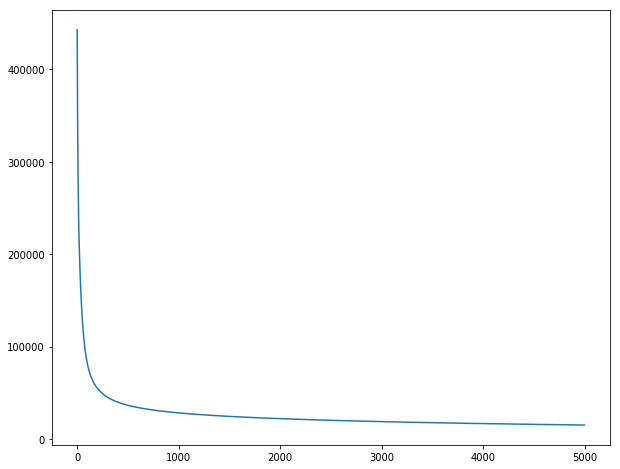

In [9]:
# build and train the model using Multinominal Logistic Regression

J = []
eta = 5e-6
epochs = 5000
for i in range(epochs):
    P_train = softmax((X_train.dot(W_train)))
    J.append(cross_entropy (Y_train,P_train))
    W_train -= eta*X_train.T.dot(P_train - Y_train)
    
plt.figure(figsize = (10, 8))
plt.plot(J)

In [10]:
W_true = W_train.copy()

In [11]:
# Test the accuracy. Checking the probability accuracy of our model comparied to actual value of y

accuracy(y[:25200], P_train)

0.8782936507936508

In [12]:
N_train = len(X_train)

In [13]:
# Training Error

TE = (1/N_train)*cross_entropy(Y_train, P_train)
TE

0.6032600873805147

In [14]:
# Testing the model on the Validation Set

P_validate = softmax((X_validate.dot(W_true)))

accuracy(y[25200:33600], P_validate)

0.8575

In [15]:
# Calculate the Validation Error 

N_validate = len(X_validate)

VE = (1/N_validate)*cross_entropy(Y_validate, P_validate)
VE

0.7341124672962084

In [16]:
# Test Model on Test Set

P_test = softmax((X_test.dot(W_true)))

accuracy(y[33600:], P_test)

0.8628571428571429

In [1]:


J = []
lambda_L1 = 2
eta = 1e-5
epochs = 2000

for i in range(epochs):
    P_validate = softmax((X_validate.dot(W_true)))
    J.append(cross_entropy(Y_validate,P_validate) + lambda_L1*(np.sum(np.abs(W_true))))
    W_true -= eta*(X_train.T.dot(P_train - Y_train) + lambda_L1*np.sign(W_true))
    
plt.figure(figsize = (12, 9))
plt.plot(J)

NameError: name 'softmax' is not defined

In [ ]:
# Move on to the validation set and build the confusion matrix to gain more insight. 
# good job john for tonight. 

In [ ]:
# Since we have many features in this dataset, some are which are all zeros, we can minimize or penalize features
# that do not make our model better. So we will use Lasso Regularization

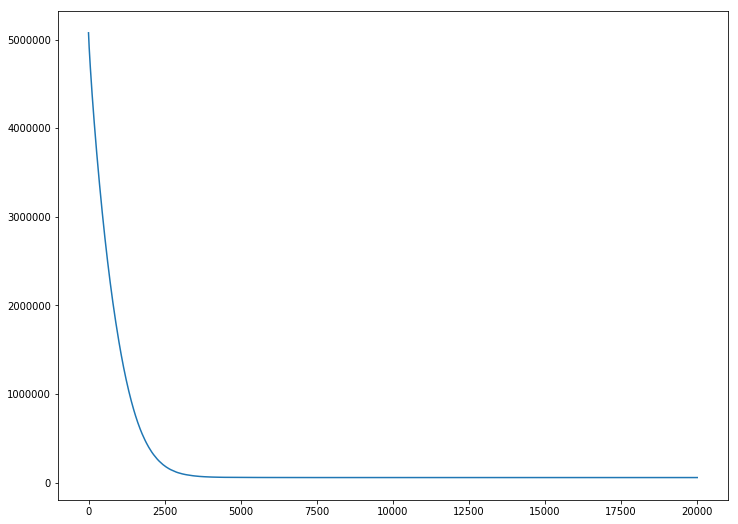

In [59]:
# build and train the model using Multinominal Logistic Regression with L1 Lasso Regularization

# setting random weights for the training set

W_train_L1 = np.random.randn(D, K)


J = []
lambda_L1 = 3
eta = 1e-6
epochs = 6000

for i in range(epochs):
    P_train_L1 = softmax((X_train.dot(W_train_L1)))
    J.append(cross_entropy (Y_train,P_train_L1) + lambda_L1*np.sum(np.abs(W_train_L1)))
    W_train_L1 -= eta*(X_train.T.dot(P_train_L1 - Y_train) + lambda_L1*np.sign(W_train_L1))
    
plt.figure(figsize = (12, 9))
plt.plot(J)

In [56]:
# Testing Validation Set

NameError: name 'W_train_L1' is not defined

In [61]:
# Testing performance on Test data

0.5407142857142857